In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\MULTIDISEASE\Dataset\diabetes.csv")


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.size

6912

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  768
Number of Columns:  9


In [13]:
cols_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in cols_zero_missing:
    median = df.loc[df[c] > 0, c].median()
    df.loc[df[c] == 0, c] = median

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
X = df.drop(columns=["Outcome"])
Y = df["Outcome"]

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=2000,random_state=42)
LR.fit(X_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [20]:
y_pred_log =LR.predict(X_test_scaled)
y_proba_log = LR.predict_proba(X_test_scaled)[:,1]

In [21]:
LR_score_train = LR.score(X_train_scaled, Y_train)
LR_score_train

0.7964169381107492

In [22]:
LR_score_test  = LR.score(X_test_scaled, Y_test)
LR_score_test

0.7077922077922078

Text(20.72222222222222, 0.5, 'Actual')

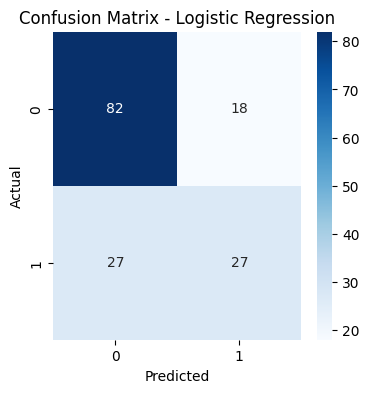

In [23]:
from sklearn.metrics import confusion_matrix


cm_log = confusion_matrix(Y_test, y_pred_log)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=500,max_depth=12,min_samples_split=6,min_samples_leaf=3,max_features='sqrt',class_weight='balanced'  )
rf_model.fit(X_train, Y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,12
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred_rf  = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [26]:
RF_score_train = rf_model.score(X_train, Y_train)
RF_score_train

0.9429967426710097

In [27]:
RF_score_test  = rf_model.score(X_test, Y_test)
RF_score_test

0.7532467532467533

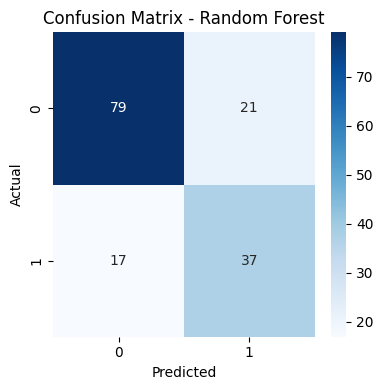

In [28]:
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

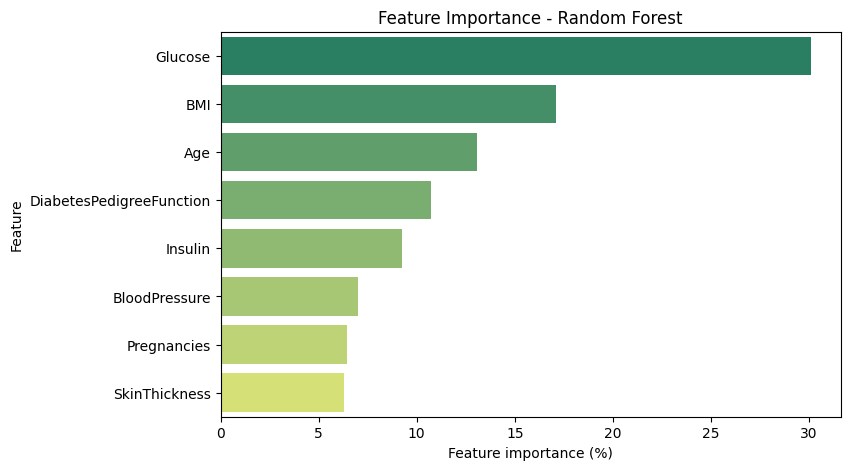

In [29]:
feat_imp = pd.DataFrame({'Feature': X.columns,'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
feat_imp['Importance (%)'] = feat_imp['Importance'] * 100
plt.figure(figsize=(8,5))
sns.barplot(x='Importance (%)', y='Feature', data=feat_imp, palette='summer')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature importance (%)')
plt.ylabel('Feature')
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_score_train = knn_model.score(X_train_scaled, Y_train)
knn_score_train

0.8306188925081434

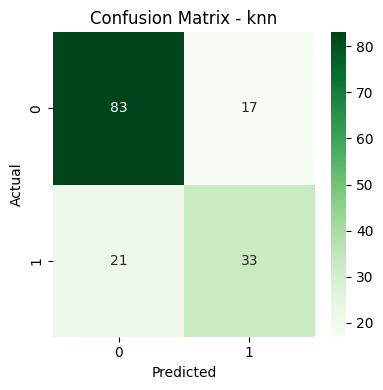

In [32]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - knn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
dt_score_train = dt_model.score(X_train, Y_train)
dt_score_train

1.0

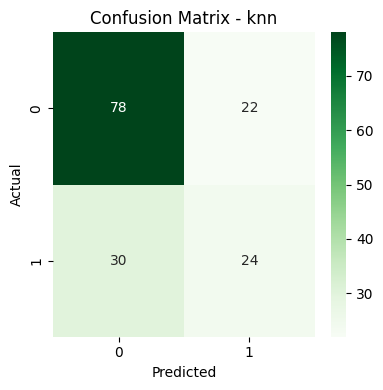

In [35]:
cm_dt = confusion_matrix(Y_test, y_pred_dt)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - knn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train,Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [37]:
y_pred_gbc = gbc_model.predict(X_test)
y_proba_gbc = gbc_model.predict_proba(X_test)[:, 1]
gbc_score_train = gbc_model.score(X_train, Y_train)
gbc_score_train

0.9250814332247557

In [38]:
cm_gbc = confusion_matrix(Y_test, y_pred_gbc)
pd.DataFrame(cm_gbc, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,87,13
Yes,21,33


In [39]:
from sklearn.metrics import classification_report


print(classification_report(Y_test,y_pred_gbc))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



# MODEL EVALUATION

In [40]:
from sklearn.metrics import accuracy_score

X_train_prediction = dt_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [41]:
X_test_prediction = dt_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.6623376623376623


# MAKING A PREDICTIVE SYSTEM

In [51]:


models_dict = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}


In [ ]:
best_model_name='Decision Tree'
diabetes_model=models_dict[best_model_name]
diabetes_model.fit(X_train_prediction,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:

input_data = (3,128,78,0,0,21.1,0.268,55)
new_df = pd.DataFrame([input_data],columns=X.columns)

In [56]:
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,128,78,0,0,21.1,0.268,55


In [57]:
prediction=dt_model.predict(new_df)

if prediction[0]==0:
    print("The person is not diabetic")
else:
     print("The person is diabetic")

The person is not diabetic


# SAVING THE TRAINED MODEL

In [58]:
import pickle
filename = 'diabetes_model.pkl'
pickle.dump(diabetes_model, open(filename, 'wb'))